In [1]:
import requests
import cv2 as cv
from matplotlib import pyplot as plt 
import numpy as np

from utils import *

# Scale Invariant Feature Transform (SIFT)

[Additional reading](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)

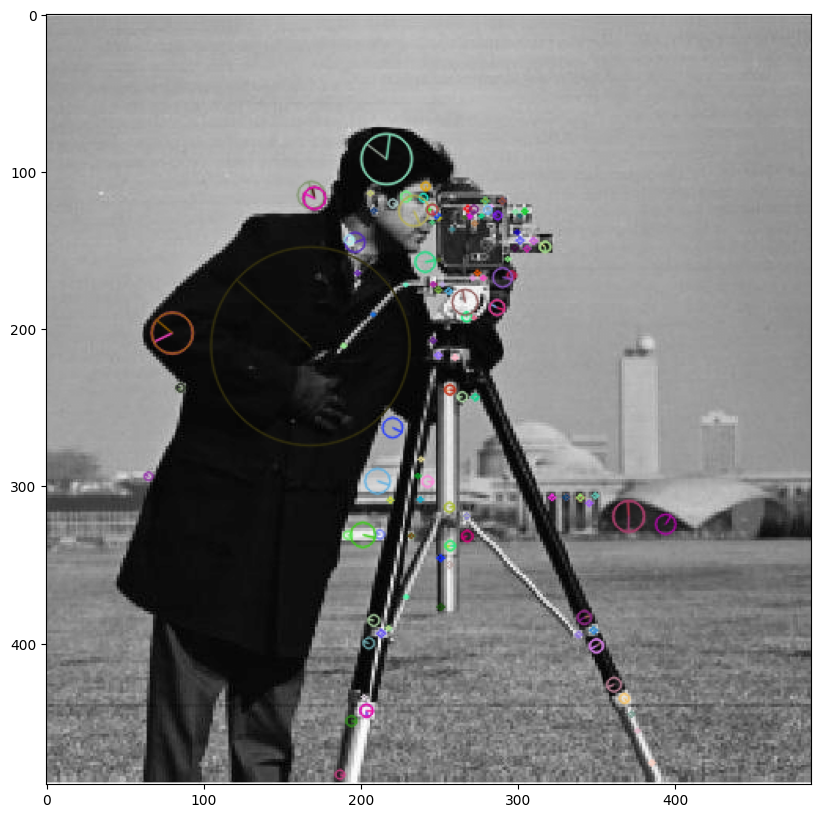

In [2]:
image = cv.imread('data/images/cameraman.png', cv.IMREAD_GRAYSCALE)

sift = cv.SIFT_create(nfeatures = 150)
kp = sift.detect(image, None)
des = sift.compute(image, kp)                   # computing the descriptor
#kp, des = siftdetectAndCompute(image, None)    # you can also do both at once

plt.figure(figsize = (10,10))
img = cv.drawKeypoints(image, kp, -1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

In [3]:
kp[0].angle     # overall angle/orientation

80.46453857421875

In [4]:
kp[0].pt        # coordinates

(282.5284423828125, 121.94505310058594)

In [5]:
kp[0].size      # at what scale did we find this feature

2.112946033477783

In [8]:
# we have a descriptor for each keypoint
des[1].shape        # we have 150 features, and for each, the dimension is 128
des[1][0]           # descriptor of the first keypoint

array([  0.,   0.,   0.,  13., 114.,  54.,  13.,   1.,  39.,   0.,   0.,
         1.,  18.,  28.,  41.,  90.,  18.,   1.,  10.,  25.,  97.,  29.,
         6.,  31.,   0.,   9.,  56.,  11.,  14.,  10.,   3.,   0.,  10.,
        14.,  24.,  71.,  46.,  19.,   7.,   2., 108.,  20.,   8.,   3.,
         5.,  34.,  51., 108.,  10.,   0.,   0.,   1.,  47., 138.,  91.,
        26.,   0.,   0.,   0.,   0.,   5., 129., 110.,   0.,  54.,  25.,
        19.,  69.,  67.,   0.,   0.,   1., 138.,  38.,   6.,   6.,   4.,
         4.,   4.,  17.,  39.,   5.,   1.,  16.,  18.,  72.,  41.,  22.,
         1.,   0.,   2.,  30.,  19., 128.,  89.,   6.,  69.,   2.,   1.,
        20.,  62.,   0.,   0.,   7., 138.,  31.,   2.,   1.,   1.,   0.,
         0.,  20.,  23.,  32.,  11.,  40.,  14.,   1.,   2.,  12.,   1.,
         1.,  23., 138.,  31.,   6.,   2.,   2.], dtype=float32)

# SIFT Feature Matching

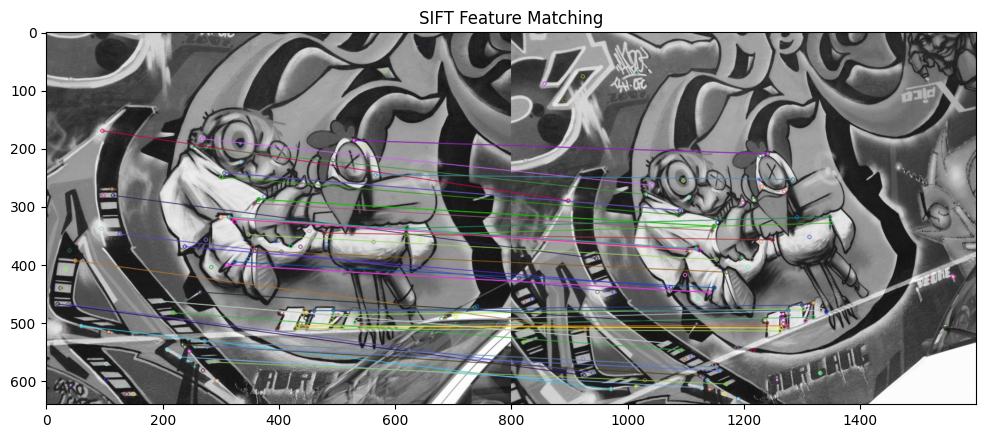

In [46]:
# Load images
image1 = cv.imread('data/images/cartoon1.pgm', cv.IMREAD_GRAYSCALE)
image2 = cv.imread('data/images/cartoon2.pgm', cv.IMREAD_GRAYSCALE)

# Initialize ORB detector
feat = cv.SIFT_create(nfeatures = 150)

# Find the keypoints and descriptors with ORB
keypoints1, descriptors1 = feat.detectAndCompute(image1, None)
keypoints2, descriptors2 = feat.detectAndCompute(image2, None)

# Create BFMatcher (Brute Force Matcher)
bf = cv.BFMatcher()

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort them in ascending order of distance 
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
img_matches = cv.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], 
                              cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
                              

# Plot the matches using Matplotlib
plt.figure(figsize = (12,8))
plt.imshow(img_matches)
plt.title('SIFT Feature Matching')
plt.show()